<h1 align="center"> ELO Ranking for professional Dota team</h1>

<h2 align="center"> Manilla Major Invitation 2016</h2>


In [1]:
# Some import
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

plt.style.use('ggplot')

<h2> Elo funtion and class</h2>

In [2]:
# Elo formula 
# R=R+KG(W-We)
# R = Elo rank
# K = Weight of competition
# G = coefficient according to the result

def compute_elo(Team1, Team2 ,score1, score2 ,Tournament):
    elo1 = Team1.elo 
    elo2 = Team2.elo 
    k = Tournament.weight
    We1 = 1/(1+10**(-(elo1-elo2)/400))
    We2 = 1/(1+10**(-(elo2-elo1)/400))
    
    if(score1==score2):
        elo1 = elo1 + k * 1 *(0.5-We1)
        elo2 = elo2 + k * 1 *(0.5-We2)
    elif(score1>score2+1):
        elo1 = elo1 + k * 1.5 *(1-We1)
        elo2 = elo2 - k * 1.5 *(We2)
    elif(score1>score2):
        elo1 = elo1 + k * 1 *(1-We1)
        elo2 = elo2 - k * 1 *(We2)
    elif(score2>score1+1):
        elo1 = elo1 - k * 1.5 *(We1)
        elo2 = elo2 + k * 1.5 *(1-We2)
    elif(score2>score1):
        elo1 = elo1 - k * 1 *(We1)
        elo2 = elo2 + k * 1 *(1-We2)
    
    Team1.elo = round(elo1)
    Team2.elo = round(elo2)

def display_rank(List_team):
    l =[]
    for team in List_team:
        l.append([team.name,team.elo,team.major,team.tournament])
    df =pd.DataFrame(data=l, columns=["team","Rank", "Major", "Tournament"])
    return df.sort_values(by="Rank", ascending=0).reset_index(drop=True)

In [5]:
class Team:
    def __init__(self,name, elo=1000, major=0, tournament=0,invited=False,place="17"):
        self.elo = elo
        self.name = name
        self.major = major
        self.tournament = tournament
        self.invited=invited
        self.place=place
    
class Tournament:
        def __init__(self,name, weight):
            self.weight = weight
            self.name = name

### Weight of tournament
* The International: 60
* Major: 50
* Cash price >200k: 30
* Cash price >100k & <200k: 20
* Cash price <100K: 10

<h2>The Shangai Major</h2>


In [6]:
# Create Tournament
Shangai_major = Tournament("NotLikeThis The Shangai Major 2015 NotLikeThis",50)

Vici_Gaming = Team("Vici Gaming", 1000,place="13-16")
Evil_Geniuses  = Team("Evil Geniuses", 1000,invited=True,place="3")
Team_Secret  = Team("Team Secret", 1000,invited=True,place="1")
LGD_Gaming  = Team("LGD Gaming", 1000,invited=True,place="9-12")
Virtus_pro  = Team("Virtus Pro", 1000,place="9-12")
Newbee  = Team("Newbee", 1000,place="9-12")
Fnatic  = Team("Fnatic", 1000,invited=True,place="5-6")
CDEC_Gaming = Team("CDEC Gaming", 1000,place="13-16")
Ehome  = Team("EHOME", 1000,place="9-12")
Alliance = Team("Alliance",1000,invited=True,place="7-8")
OG = Team("OG",1000,invited=True,place="7-8")
TL = Team("Team Liquid",1000,invited=True,place="2")
Team_Spirit = Team("Team_Spirit",1000,place="13-16")
Team_Archon = Team("Team Archon", 1000,place="13-16")
Complexity = Team("compLexity Gaming", 1000,invited=True,place="5-6")
MVP_Phoenix=Team("MVP Phoenix", 1000,invited=True,place="4")

List_team = [Vici_Gaming,Evil_Geniuses,Team_Secret,LGD_Gaming,Virtus_pro,Newbee,Fnatic
             ,CDEC_Gaming,Ehome, Alliance, OG, TL, Team_Spirit, Team_Archon, Complexity, MVP_Phoenix]


In [7]:
# Groupe stage
compute_elo(MVP_Phoenix,Ehome,2,0,Shangai_major)
compute_elo(Team_Secret,CDEC_Gaming,2,1,Shangai_major)
compute_elo(Ehome,CDEC_Gaming,2,1,Shangai_major)
compute_elo(MVP_Phoenix,Team_Secret,2,0,Shangai_major)
compute_elo(Team_Secret,Ehome,2,0,Shangai_major)
compute_elo(Alliance,Team_Spirit,2,0,Shangai_major)
compute_elo(Fnatic,Vici_Gaming,2,1,Shangai_major)
compute_elo(Team_Spirit,Vici_Gaming,2,0,Shangai_major)
compute_elo(Alliance,Fnatic,2,0,Shangai_major)
compute_elo(Fnatic,Team_Spirit,2,1,Shangai_major)
compute_elo(OG,Team_Archon,2,0,Shangai_major)
compute_elo(LGD_Gaming,Newbee,2,1,Shangai_major)
compute_elo(LGD_Gaming,Team_Archon,2,0,Shangai_major)
compute_elo(OG,LGD_Gaming,2,1,Shangai_major)
compute_elo(LGD_Gaming,Newbee,2,0,Shangai_major)
compute_elo(Evil_Geniuses,Complexity,2,1,Shangai_major)
compute_elo(Virtus_pro,TL,2,1,Shangai_major)
compute_elo(TL,Complexity,2,0,Shangai_major)
compute_elo(Evil_Geniuses,Virtus_pro,2,0,Shangai_major)
compute_elo(TL,Virtus_pro,2,0,Shangai_major)

# Play-off
compute_elo(TL,Alliance,2,1,Shangai_major)
compute_elo(MVP_Phoenix,LGD_Gaming,2,0,Shangai_major)
compute_elo(Team_Secret,OG,2,1,Shangai_major)
compute_elo(Evil_Geniuses,Fnatic,2,0,Shangai_major)
compute_elo(TL,MVP_Phoenix,2,0,Shangai_major)
compute_elo(Team_Secret,Evil_Geniuses,2,1,Shangai_major)
compute_elo(Team_Secret,TL,2,0,Shangai_major)
compute_elo(Ehome,Team_Archon,1,0,Shangai_major)
compute_elo(Complexity,Team_Spirit,1,0,Shangai_major)
compute_elo(Virtus_pro,Vici_Gaming,1,0,Shangai_major)
compute_elo(Newbee,CDEC_Gaming,1,0,Shangai_major)
compute_elo(Alliance,Ehome,1,0,Shangai_major)
compute_elo(Complexity,LGD_Gaming,1,0,Shangai_major)
compute_elo(OG,Virtus_pro,1,0,Shangai_major)
compute_elo(Fnatic,Newbee,1,0,Shangai_major)
compute_elo(Complexity,Alliance,2,1,Shangai_major)
compute_elo(Fnatic,OG,2,1,Shangai_major)
compute_elo(Evil_Geniuses,Complexity,2,0,Shangai_major)
compute_elo(MVP_Phoenix,Fnatic,2,0,Shangai_major)
compute_elo(Evil_Geniuses,MVP_Phoenix,2,0,Shangai_major)
compute_elo(TL,Evil_Geniuses,2,0,Shangai_major)
compute_elo(Team_Secret,TL,3,1,Shangai_major)

Team_Secret.elo+=Shangai_major.weight
Team_Secret.major=1

In [8]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,Team Secret,1210,1,0
1,Evil Geniuses,1093,0,0
2,Team Liquid,1081,0,0
3,MVP Phoenix,1065,0,0
4,Alliance,1037,0,0
5,OG,1028,0,0
6,Fnatic,1002,0,0
7,LGD Gaming,997,0,0
8,compLexity Gaming,992,0,0
9,Virtus Pro,956,0,0


<h2>Dota Pit League Season 4</h2>


In [9]:
# Create Tournament
Pit_league = Tournament("Dota Pit League Season 4",20)

# Introducing new teams
Empire = Team("Team Empire", 1000)
Navi = Team("Natus Vincere", 1000,invited=True)

List_team.append(Navi)
List_team.append(Empire)

In [10]:
compute_elo(MVP_Phoenix,OG,2,1,Pit_league)
compute_elo(Complexity,Virtus_pro,2,0,Pit_league)
compute_elo(Navi,Team_Secret,2,1,Pit_league)
compute_elo(Evil_Geniuses,Empire,2,1,Pit_league)
compute_elo(MVP_Phoenix,Complexity,2,0,Pit_league)
compute_elo(Evil_Geniuses,Navi,2,1,Pit_league)
compute_elo(MVP_Phoenix,Evil_Geniuses,3,0,Pit_league) #lul

MVP_Phoenix.elo+=Pit_league.weight
MVP_Phoenix.tournament+=1

In [11]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,Team Secret,1195,1,0
1,MVP Phoenix,1122,0,1
2,Evil Geniuses,1092,0,0
3,Team Liquid,1081,0,0
4,Alliance,1037,0,0
5,OG,1019,0,0
6,Natus Vincere,1007,0,0
7,Fnatic,1002,0,0
8,LGD Gaming,997,0,0
9,compLexity Gaming,993,0,0


<h2>StarLadder i-League Invitational</h2>


In [12]:
# Create Tournament
Starladder = Tournament("StarLadder i-League Invitational",20)

# Introducing new teams
VGr = Team("Vici Gaming Reborn",1000,invited=True)
Vega = Team("Vega Squadron",1000)

List_team.append(VGr)
List_team.append(Vega)

In [13]:
compute_elo(LGD_Gaming,Vega,2,0,Starladder)
compute_elo(Alliance,Virtus_pro,2,0,Starladder)
compute_elo(VGr,MVP_Phoenix,2,0,Starladder)
compute_elo(Navi,OG,2,0,Starladder)
compute_elo(LGD_Gaming,Alliance,2,1,Starladder)
compute_elo(Navi,VGr,2,0,Starladder)
compute_elo(Navi,LGD_Gaming,2,0,Starladder)

compute_elo(Virtus_pro,Vega,2,1,Starladder)
compute_elo(OG,MVP_Phoenix,2,0,Starladder)
compute_elo(VGr,Virtus_pro,2,1,Starladder)
compute_elo(OG,Alliance,2,1,Starladder)
compute_elo(VGr,OG,2,1,Starladder)
compute_elo(VGr,LGD_Gaming,2,1,Starladder)
compute_elo(VGr,Navi,3,1,Starladder)

VGr.elo+=Starladder.weight
VGr.tournament+=1

In [14]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,Team Secret,1195,1,0
1,Evil Geniuses,1092,0,0
2,MVP Phoenix,1083,0,1
3,Team Liquid,1081,0,0
4,Vici Gaming Reborn,1070,0,1
5,Natus Vincere,1036,0,0
6,Alliance,1027,0,0
7,OG,1021,0,0
8,Fnatic,1002,0,0
9,LGD Gaming,999,0,0


<h2>ESL One Manila 2016</h2>


In [15]:
# Create Tournament
ESL = Tournament("ESL One Manila 2016",30)

# Introducing new teams
Mineski = Team("Mineski",1000)
Wings = Team("Wings Gaming",1000,invited=True)

List_team.append(Mineski)
List_team.append(Wings)

In [16]:
# Group stage
compute_elo(TL,Mineski,2,0,ESL)
compute_elo(Wings,Complexity,2,1,ESL)
compute_elo(TL,Wings,2,0,ESL)
compute_elo(Complexity,Mineski,2,1,ESL)
compute_elo(Wings,Complexity,2,1,ESL)
compute_elo(Empire,Team_Secret,2,0,ESL)
compute_elo(Fnatic,Ehome,2,0,ESL)
compute_elo(Fnatic,Empire,2,0,ESL)
compute_elo(Team_Secret,Ehome,2,0,ESL)
compute_elo(Empire,Team_Secret,2,1,ESL)

# Play_off
compute_elo(TL,Empire,2,0,ESL)
compute_elo(Wings,Fnatic,2,1,ESL)
compute_elo(Wings,TL,3,0,ESL)

Wings.elo+=ESL.weight
Wings.tournament+=1

In [17]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,Team Secret,1149,1,0
1,Team Liquid,1103,0,0
2,Evil Geniuses,1092,0,0
3,Wings Gaming,1088,0,1
4,MVP Phoenix,1083,0,1
5,Vici Gaming Reborn,1070,0,1
6,Natus Vincere,1036,0,0
7,Fnatic,1028,0,0
8,Alliance,1027,0,0
9,OG,1021,0,0


Here all lans which occured between Shangai and Manille Major
The invited teams by Valve are:

* Team Secret 
* Team Liquid  
* Evil Geniuses  
* MVP Phoenix  
* Wings Gaming  
* Alliance  
* OG  
* Fnatic  
* Vici Gaming Reborn  
* Natus Vincere  
* LGD Gaming  
* compLexity Gaming

Teams with highest score are: 

* Team Secret 
* Team Liquid  
* Evil Geniuses  
* MVP Phoenix  
* Wings Gaming  
* Alliance  
* OG  
* Fnatic  
* Vici Gaming Reborn  
* Natus Vincere  
* LGD Gaming  
* Team Empire


In [21]:
l=[]
for team in List_team:
    l.append([team.name,team.elo,team.major,team.tournament,team.invited,team.place])
df =pd.DataFrame(data=l, columns=["team","Rank", "Major", "Tournament", "Invited",'place'])

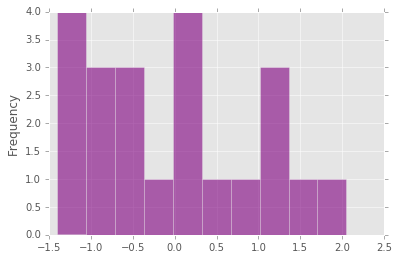

In [22]:
mean=df.Rank.mean()
std = df.Rank.std()
df["norm_elo"]=np.around((df.Rank-mean)/std, decimals=2)
df.norm_elo.plot.hist(alpha=0.6, color="purple")

In [23]:
df.to_csv("data/spring_2016.csv")

In [24]:
df.sort_values(by="norm_elo", ascending=0).reset_index(drop=True)

,team,Rank,Major,Tournament,Invited,place,norm_elo
0,Team Secret,1149,1,0,True,1,2.05
1,Team Liquid,1103,0,0,True,2,1.39
2,Evil Geniuses,1092,0,0,True,3,1.23
3,Wings Gaming,1088,0,1,True,17,1.18
4,MVP Phoenix,1083,0,1,True,4,1.11
5,Vici Gaming Reborn,1070,0,1,True,17,0.92
6,Natus Vincere,1036,0,0,True,17,0.44
7,Fnatic,1028,0,0,True,5-6,0.32
8,Alliance,1027,0,0,True,7-8,0.31
9,OG,1021,0,0,True,7-8,0.22
